<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%201/6_DYI_Symbolic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2024 Course on mathematic methods.
- Instructor Sergei V. Kalinin, sergei2@utk.edu

# Genetic Algorithms

This example is taken from Chapter 6 of
https://livebook.manning.com/book/deep-reinforcement-learning-in-action/chapter-2/79

In [9]:
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A
target = "Hello World!" #B

class Individual: #C
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

from difflib import SequenceMatcher

def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

def spawn_population(length=14,size=100): #E
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop

#A This is the list of characters we sample from to produce random strings
#B This is the string we’re trying to evolve from a random population
#C We set up a simple class to store information about each member of the population
#D This method will compute a similarity metric between two strings, giving us a fitness score
#E This method will produce an initial random population of strings

In [10]:
pop_init = spawn_population()
for i,val in enumerate(pop_init):
  if i%10 ==0:
    print(val.string)

yNasWFZSi.kZcy
xXQQrgkXOelkbz
wxytBxvHJHoaKE
cUaJoiFnnjsRdR
,mHOrL,b!NguDq
SKOCptAVHAHZG.
bUw.DzxEVhYLti
mCtaWqGTIRHopa
Tkj,CZHwsZrR.q
cDFcndappN,AiM


In [11]:
def recombine(p1_, p2_): #A
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

def mutate(x, mut_rate=0.01): #B
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

#A This function recombines two parent strings into two new offspring
#B This function will mutate a string by randomly flipping characters

In [12]:
def evaluate_population(pop, target): #A
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

def next_generation(pop, size=100, length=14, mut_rate=0.01): #B
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        child1 = mutate(offspring_[0], mut_rate=mut_rate)
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A This function assigns a fitness score to each individual in the population
#B This function generates a new generation by recombination and mutation

In [13]:
num_generations = 100
population_size = 1000
str_len = len(target)
mutation_rate = 0.001 #A

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #B
done = False

for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #C
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop
    for x in pop:
        if x.string == target:
            print("Target Found!")
            done = True
    if done:
        break
#A Set the mutation rate to 0.1%
#B Create the initial random population
#C Record population average fitness over training time

Target Found!


In [14]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first
print(f"{pop[0].string}\n{pop[1].string}\n{pop[2].string}")

Hllfl WWold!
eleeo Whrld!
HlHlo World!


In [15]:
for x in pop:
  print(x.string)

Hllfl WWold!
eleeo Whrld!
HlHlo World!
Hlell WhoOd!
Hlelo Wotld!
HelHl WWrl!B
Hle l WQold!
Heell Whord!
Hlefl WWor!!
Haell WQold!
Hlelo WQold!
Hlllo WQold!
Hkefl WQoldw
HeHll World!
Hllll WoordS
Hlell World!
Helll WQold!
Hlllo Woold!
elHll Woold!
HZlll Werld!
Hlelo WQoldw
eeell WQrrd!
Hlllo WQordw
ellOl WQold!
Hlefl WorldY
Hxell Werld!
HlHGl WQrld!
Helll Wnold!
Hlell Whol!!
eZHll wQold!
Hlell Whrld!
Hlpfl Whrld!
HZlll Worldx
pllfo WIordw
Hllll Whold!
eeufl Werl!!
Hllll Weord!
HeHll wWol !
Hloll Weold!
Mlell WWrl!!
Hecll Weold!
Hlell WerldS
HlHfl Wool!k
Hqlll WholdS
Hlefl WQrld!
HeHll Woord!
Hlelo WWord!
HTuGo WWol!w
HllHl Woold!
Hlelo WQold!
HeHlo OWrld!
Hllll Worldw
eelfl WQrld!
Helll Worldb
elUfl Wnoldz
Heell Whrld!
tlell World!
Hlell WQord!
HZell World!
eeelo WQold!
Hlell Weold!
elHfl WorldY
Hllll wWol!!
Hlell Whold!
ellll WIold!
Hllll Whrld!
Ulell Woold!
HeHll Woord!
HTelp Wbol!L
HeelJ World!
Helfl Weol!!
Heell Whrld!
eleloWWorldw
HeUfl World!
HluGl Woold!
Heell Worl!!
Hleel WWoldd

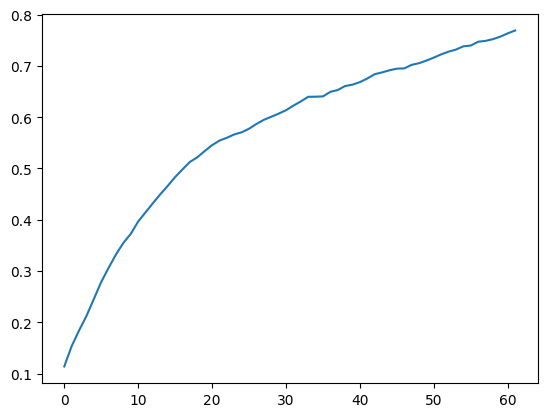

In [16]:
plt.plot(pop_fit)

# Function optimization

From https://livebook.manning.com/book/optimization-algorithms/chapter-8/v-11/58  

In [17]:
import numpy as np
import random
from tqdm.notebook import tqdm
from copy import copy
import matplotlib.pyplot as plt

In [18]:
def profit(x):
    return -20*x*x+6200*x-350000

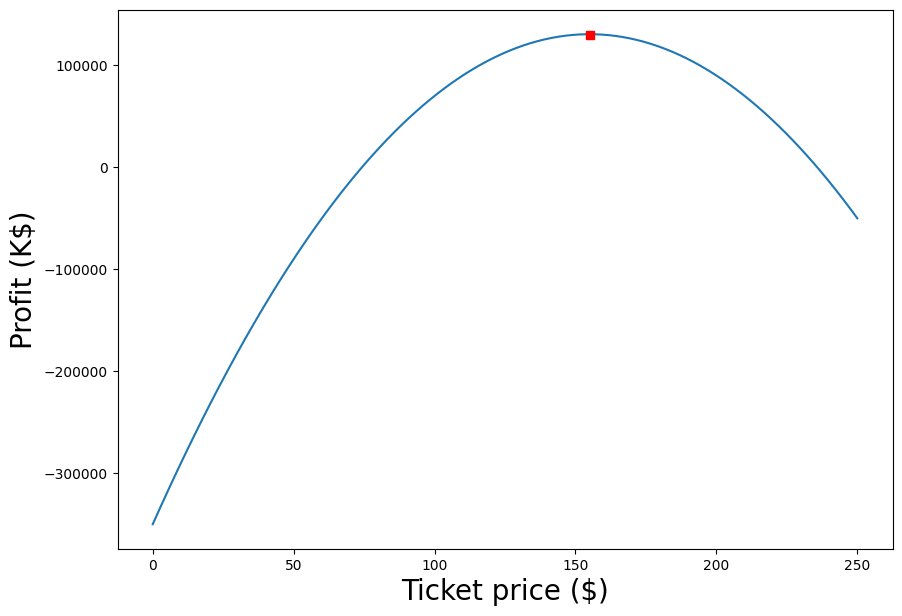

In [19]:
# Plot proft-ticket price curve
plt.figure(figsize=(10, 7))
x = np.linspace(0, 250, 100)
plt.plot(x, profit(x))

# Plot the optima
plt.plot(155, 130000, "s", color="r")

# Add title and axis names
plt.xlabel("Ticket price ($)", fontsize=20)
plt.ylabel("Profit (K$)", fontsize=20)
plt.show()

In [20]:
def init_pop(pop_size, chromosome_length):
    ints = [random.randint(0,250) for i in range(pop_size)]
    strs = [bin(n)[2:].zfill(chromosome_length) for n in ints]
    bins = [[int(x) for x in n] for n in strs]
    #print(ints)
    #print(strs)
    #print(bins)
    return bins

In [21]:
init_pop(10, 20)

[241, 229, 172, 159, 97, 164, 228, 70, 5, 112]
['00000000000011110001', '00000000000011100101', '00000000000010101100', '00000000000010011111', '00000000000001100001', '00000000000010100100', '00000000000011100100', '00000000000001000110', '00000000000000000101', '00000000000001110000']


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]]

In [21]:
def fitness_score(population):
    fitness_values = []
    num = []
    for i in range(len(population)):
        num.append(int("".join(str(x) for x in population[i]), base=2))  # convert binary to decimal
        fitness_values.append(profit(num[i]))
    tuples = zip(*sorted(zip(fitness_values,population),reverse=True))
    fitness_values, population = [list(t) for t in tuples]
    return fitness_values, population

In [22]:
fitness_score(init_pop(10, 12))

([130420,
  129780,
  127620,
  116980,
  115920,
  111280,
  84420,
  82480,
  -20880,
  -250380],
 [[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
  [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
  [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
  [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
  [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [23]:
def select_parent(population, num_parents):
    parents=random.sample(population, num_parents)
    return parents

In [24]:
def roulette_wheel_selection(population, num_parents):
    # Calculate total fitness
    fitness_values, population = fitness_score(population)
    total_fitness = sum(fitness_values)

    # Calculate selection probabilities for each individual
    probabilities = [fitness / total_fitness for fitness in fitness_values]

    # Perform roulette wheel selection
    selected_parents = []
    for i in range(num_parents):  # Select only 2 parents
        # Pick a random number between 0 and 1
        r = random.random()

        # Find the individual whose cumulative probability includes r
        cumulative_probability = 0
        for j in range(len(population)):
            cumulative_probability += probabilities[j]
            if cumulative_probability > r:
                selected_parents.append(population[j])
                break

    return selected_parents

In [25]:
def crossover(parents, crossover_prob):
    chromosome_length = len(parents[0])
    if crossover_prob > random.random():
        cross_point = random.randint(0,chromosome_length)
        parents+= tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:])])
        parents+= tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:])])
    return parents

In [26]:
def mutation(population, mutation_prob) :
    chromosome_length = len(population[0])
    for i in range(len(population)) :
        for j in range(chromosome_length-1) :
            if mutation_prob > random.random():
                if population[i][j]==1:
                    population[i][j]=0
                else:
                    population[i][j]=1
    return population

In [27]:
def BGA(population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm = False):
    states = []
    best_solution = []
    best_score = 0
    if use_tqdm: pbar = tqdm(total=num_gen)
    for _ in range(num_gen):
        if use_tqdm: pbar.update()
        # Get population fitness
        scores, population = fitness_score(population)
        current_best_score = scores[0]
        current_best_solution = population[0]
        states.append(current_best_score)
        if current_best_score > best_score:
            best_score = current_best_score
            best_solution = int("".join(str(x) for x in copy(current_best_solution)), base=2)
        parents = select_parent(population, num_parents)
        # parents = roulette_wheel_selection(population, num_parents) # uncomment this line to use roulette wheel selection
        parents = crossover(parents, crossover_prob)
        population = mutation(population,mutation_prob)
    return best_solution, best_score, states

In [28]:
num_gen = 1000
pop_size = 5
crossover_prob = 0.7
mutation_prob = 0.3
num_parents = 2

# Solution representation
chromosome_length = 8
best_score = -100000

# Initialize the "best solution"
population = init_pop(pop_size, chromosome_length)
print("Initial population: \n", population)

Initial population: 
 [[0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1]]


In [29]:
best_solution, best_score, states = BGA(population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Optimal ticket price ($): 155
Profit ($): 130500


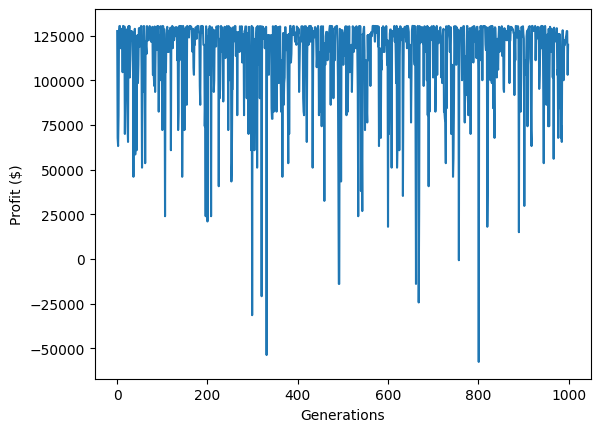

In [30]:
print(f"Optimal ticket price ($): {best_solution}")
print(f"Profit ($): {best_score}")
plt.plot(states)
plt.xlabel("Generations")
plt.ylabel("Profit ($)")
plt.show()

# Curve Fitting

From https://livebook.manning.com/book/optimization-algorithms/chapter-8/v-11/58

In [31]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=4cd25129938d59648c495c2a37b4a0ddac89ca9717eebd01195b281263c4dc36
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [32]:
import numpy as np

def third_order_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Define coefficients for the third-order polynomial
a, b, c, d = 2, -3, 4, 1

# Generate x values
x = np.linspace(0, 5, 5)

# Calculate y values using the third-order polynomial function
y = third_order_polynomial(x, a, b, c, d)

# Combine x and y values into an array of data samples
data_samples = np.column_stack((x, y))

print("Generated data samples from a third-order polynomial:\n", data_samples)

Generated data samples from a third-order polynomial:
 [[  0.        1.     ]
 [  1.25      5.21875]
 [  2.5      23.5    ]
 [  3.75     79.28125]
 [  5.      196.     ]]


In [33]:
import numpy as np
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.core.problem import Problem
from pymoo.optimize import minimize

In [34]:
class CurveFittingProblem(Problem):

    def __init__(self):
        super().__init__(n_var=4,
                         n_obj=1,
                         n_constr=0,
                         xl=-10.0,
                         xu=10.0, vtype=float)

    def _evaluate(self, X, out, *args, **kwargs):
        Y = np.zeros((X.shape[0], 1))
        for i, coeffs in enumerate(X):
            y_pred = np.polyval(coeffs, x)
            mse = np.mean((y - y_pred)**2)
            Y[i] = mse
        out["F"] = Y

In [35]:
problem = CurveFittingProblem()

algorithm = GA(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.8),
    mutation = PolynomialMutation(prob=0.3, repair=RoundingRepair()),
    eliminate_duplicates=True
)

res = minimize(problem, algorithm, ('n_gen', 100), seed=1, verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       50 |  1.703105E+05 |  1.292856E+02
     2 |      100 |  2.258338E+04 |  5.385156E+01
     3 |      150 |  3.073065E+03 |  5.385156E+01
     4 |      200 |  5.758642E+02 |  5.385156E+01
     5 |      250 |  2.881986E+02 |  3.510156E+01
     6 |      300 |  1.961443E+02 |  7.6015625000
     7 |      350 |  1.331500E+02 |  7.6015625000
     8 |      400 |  9.047087E+01 |  6.8515625000
     9 |      450 |  6.742884E+01 |  6.8515625000
    10 |      500 |  4.402634E+01 |  6.8515625000
    11 |      550 |  3.363396E+01 |  6.8515625000
    12 |      600 |  2.742688E+01 |  6.8515625000
    13 |      650 |  2.380297E+01 |  6.8515625000
    14 |      700 |  2.106391E+01 |  5.3750000000
    15 |      750 |  1.757375E+01 |  3.3750000000
    16 |      800 |  1.601406E+01 |  0.000000E+00
    17 |      850 |  1.496406E+01 |  0.000000E+00
    18 |      900 |  1.414250E+01 |  0.000000E+00
    19 |      950 |  1.308844E+01 |  0.000000E+00


In [36]:
best_coeffs = res.X
print("Coefficients of the best-fit third-order polynomial:")
print("a =", best_coeffs[0])
print("b =", best_coeffs[1])
print("c =", best_coeffs[2])
print("d =", best_coeffs[3])

Coefficients of the best-fit third-order polynomial:
a = 2
b = -3
c = 4
d = 1


In [37]:
best_coeffs

array([ 2, -3,  4,  1])

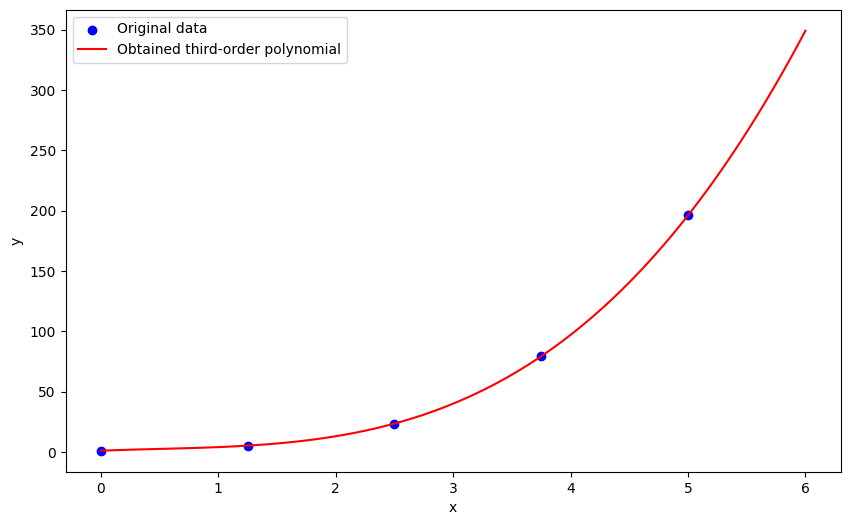

In [38]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Original data", color="blue")

# Calculate the obtained third-order polynomial
x_plot = np.linspace(0, 6, 100)
y_plot = np.polyval(best_coeffs, x_plot)

# Plot the obtained third-order polynomial
plt.plot(x_plot, y_plot, label="Obtained third-order polynomial", color="red")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()
# plt.savefig('CH08_F01_CurveFitting.png', format='png', dpi=300)

# DYI Symbolic Regression

## NumPy version

In [47]:
import random
import operator
import numpy as np
import matplotlib.pyplot as plt

# Define basic operations
ops = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': lambda x, y: x / y if y != 0 else 1,  # Avoid division by zero
}

# Generate random expression
def generate_expression(max_depth, variables, constants):
    if max_depth == 1 or random.random() < 0.5:
        # Choose either a variable or a constant
        if random.random() < 0.5:
            return random.choice(variables)
        else:
            return str(random.choice(constants))
    else:
        op = random.choice(list(ops.keys()))
        return f"({generate_expression(max_depth-1, variables, constants)} {op} {generate_expression(max_depth-1, variables, constants)})"

# Evaluate expression
def evaluate_expression(expression, variable_values):
    try:
        return eval(expression, {}, variable_values)
    except ZeroDivisionError:
        return float('inf')

# Fitness function
def fitness(expression, variable_values, target_values):
    diffs = 0
    for v, t in zip(variable_values, target_values):
        val = evaluate_expression(expression, {'x': v})
        diffs += (val - t) ** 2
    return diffs

# Create initial population
def create_population(size, max_depth, variables, constants):
    return [generate_expression(max_depth, variables, constants) for _ in range(size)]

# Simple genetic algorithm
def genetic_algorithm(population, variable_values, target_values, generations=10):
    for generation in range(generations):
        # Evaluate fitness
        scored_population = [(fitness(expr, variable_values, target_values), expr) for expr in population]
        scored_population.sort()
        best_score, best_expr = scored_population[0]

        # Print best solution of this generation
        print(f"Generation {generation}, Best Score: {best_score}, Expr: {best_expr}")

        # Selection - top 50%
        selected = [expr for _, expr in scored_population[:len(scored_population)//2]]

        # Crossover and mutation
        new_population = selected
        while len(new_population) < len(population):
            if random.random() < 0.1:  # mutation
                new_population.append(generate_expression(max_depth, variables, constants))
            else:  # crossover
                new_population.append(random.choice(selected))

        population = new_population

    return best_expr

# Example usage
variables = ['x']
constants = [i for i in range(10)]  # Numeric constants from 0 to 9
max_depth = 5
pop_size = 100
generations = 10

# Create a simple dataset (y = x^2)
x_values = np.linspace(-10, 10, 100)
y_values = x_values ** 3 + x_values - 3

# Run the genetic algorithm
population = create_population(pop_size, max_depth, variables, constants)
best_solution = genetic_algorithm(population, x_values, y_values, generations)
print("Best solution:", best_solution)


<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encounte

Generation 0, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 1, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 2, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 3, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 4, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 5, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 6, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 7, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 8, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Generation 9, Best Score: 31506.06060606066, Expr: (((5 + (x * x)) * x) - x)
Best solution: (((5 + (x * x)) * x) - x)


<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars
<string>:1: RuntimeWarning: divide by zero encounte

In [48]:
generations

10

## SymPy version

In [49]:
!pip install sympy

In [50]:
import random
import numpy as np
import sympy as sp
from sympy.abc import x  # Using x as the symbolic variable

# Generate random expression
def generate_expression(max_depth, variables):
    if max_depth == 1 or random.random() < 0.5:
        if random.random() < 0.5:  # Half chance to return a variable, half to return a constant
            return random.choice(variables)
        else:
            return sp.Rational(np.random.randint(0, 10))  # Random constant between 0 and 9 as a rational number
    else:
        op = random.choice([sp.Add, sp.Mul])
        return op(generate_expression(max_depth-1, variables), generate_expression(max_depth-1, variables))

# Evaluate expression
def evaluate_expression(expression, x_values):
    f = sp.lambdify(x, expression, 'numpy')
    try:
        return f(x_values)
    except (ValueError, FloatingPointError):
        return np.full_like(x_values, float('inf'))  # Return infinities if evaluation fails

# Fitness function
def fitness(expression, x_values, y_values):
    y_pred = evaluate_expression(expression, x_values)
    return np.sum((y_values - y_pred) ** 2)

# Create initial population
def create_population(size, max_depth, variables):
    return [generate_expression(max_depth, variables) for _ in range(size)]

# Simple genetic algorithm
def genetic_algorithm(population, x_values, y_values, generations=10):
    for generation in range(generations):
        # Evaluate fitness
        scored_population = [(fitness(expr, x_values, y_values), expr) for expr in population]
        scored_population.sort(key=lambda x: x[0])  # Sort by fitness score
        best_score, best_expr = scored_population[0]

        # Print best solution of this generation
        print(f"Generation {generation}, Best Score: {best_score}, Expr: {best_expr}")

        # Selection - top 50%
        selected = [expr for _, expr in scored_population[:len(scored_population)//2]]

        # Crossover and mutation
        new_population = selected
        while len(new_population) < len(population):
            if random.random() < 0.1:  # mutation
                new_population.append(generate_expression(max_depth, variables))
            else:  # crossover
                new_population.append(random.choice(selected))

        population = new_population

    return best_expr

# Example usage
variables = [x]  # List of variables to be used in expressions
max_depth = 25
pop_size = 100
generations = 300

# Create a simple dataset (y = x^2)
x_values = np.linspace(-20, 10, 100)
y_values = x_values ** 3 + 2 * x_values **2 - 3 * x_values + 2

# Run the genetic algorithm
population = create_population(pop_size, max_depth, variables)
best_solution = genetic_algorithm(population, x_values, y_values, generations)

# Simplify the best solution
simplified_solution = sp.simplify(best_solution)
print("Best simplified solution:", simplified_solution)


Generation 0, Best Score: 432242097.9215974, Expr: 16*x
Generation 1, Best Score: 432242097.9215974, Expr: 16*x
Generation 2, Best Score: 432242097.9215974, Expr: 16*x
Generation 3, Best Score: 432242097.9215974, Expr: 16*x
Generation 4, Best Score: 432242097.9215974, Expr: 16*x
Generation 5, Best Score: 432242097.9215974, Expr: 16*x
Generation 6, Best Score: 432242097.9215974, Expr: 16*x
Generation 7, Best Score: 432242097.9215974, Expr: 16*x
Generation 8, Best Score: 219140041.43385503, Expr: 90*x
Generation 9, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 10, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 11, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 12, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 13, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 14, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 15, Best Score: 11718960.49475471, Expr: x**3 + 2*x + 5
Generation 16, Best Score: 

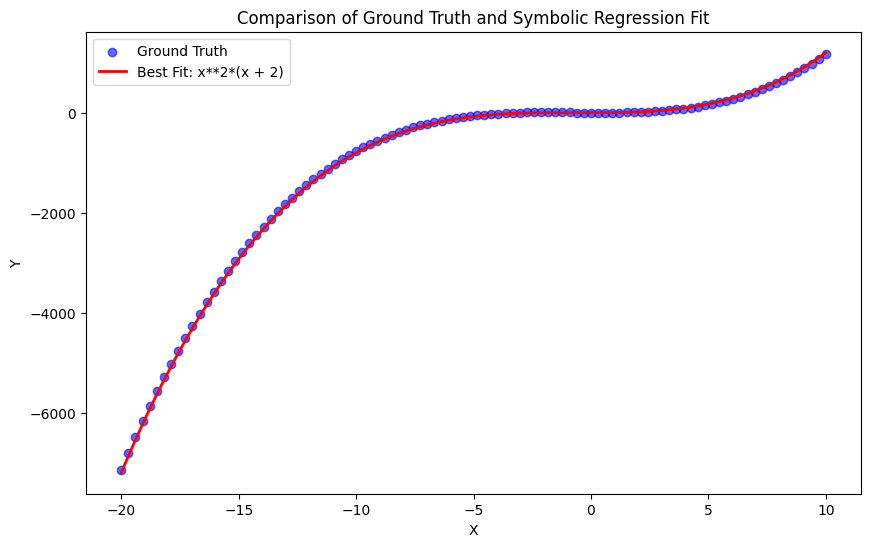

In [51]:
# Using the best solution obtained from the previous genetic algorithm
# to compare the ground truth with the fit

# Evaluate the best solution
best_solution_evaluated = evaluate_expression(simplified_solution, x_values)

# Visualization
plt.figure(figsize=(10, 6))

# Plot the ground truth data
plt.scatter(x_values, y_values, color='blue', label='Ground Truth', alpha=0.6)

# Plot the fit from the best solution
plt.plot(x_values, best_solution_evaluated, color='red', label=f'Best Fit: {simplified_solution}', linewidth=2)

plt.title('Comparison of Ground Truth and Symbolic Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# (optional) PID Controller by GA

From https://livebook.manning.com/book/optimization-algorithms/chapter-8/v-11/58   

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control
import math
import matplotlib.pyplot as plt

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.pntx import PointCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.core.problem import Problem
from pymoo.optimize import minimize

def transfer_function(Kp,Ki,Kd):
    num = np.array([Kd,Kp,Ki])
    den = np.array([1,(Kd+10),(Kp+20),Ki])
    T = control.tf(num, den)
    t, y = control.step_response(T)
    return T, t, y

In [ ]:
def objective_function(t, error, Kp,Ki,Kd, criterion):

    if criterion == 1:
        ITAE = np.trapz(t, t*error)
        objfnc= ITAE
    elif criterion == 2:
        ITSE = np.trapz(t, t*error**2)
        objfnc= ITSE
    elif criterion == 3:
        IAE =  np.trapz(t, error)
        objfnc= IAE
    elif criterion == 4:
        ISE = np.trapz(t, error**2)
        objfnc= ISE
    elif criterion == 5:
        T, _, _ =transfer_function(Kp,Ki,Kd)
        info = control.step_info(T)
        beta = 1
        Mp = info['Overshoot']
        tr = info['RiseTime']
        ts = info['SettlingTime']
        ess = abs(1-info['SteadyStateValue'])
        W = ((1-math.exp(-beta))*(Mp+ess))+((math.exp(-beta))*(ts-tr))
        objfnc=W;

    return objfnc

In [ ]:
class PIDProblem(Problem):

    def __init__(self):
        super().__init__(n_var=3,
                         n_obj=1,
                         n_constr=0,
                         xl=0,
                         xu=100,
                         vtype=float)

    def _evaluate(self, X, out, *args, **kwargs):
        f = np.zeros((X.shape[0], 1))
        for i, params in enumerate(X):
            Kp, Ki, Kd = params
            T, t, y =transfer_function(Kp,Ki,Kd)
            error = 1 - y
            f[i]=objective_function(t, np.abs(error), Kp,Ki,Kd, 1)
        out["F"] = f

In [ ]:
problem = PIDProblem()

algorithm = GA(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=PointCrossover(prob=0.8, n_points=2),
    mutation = PolynomialMutation(prob=0.3, repair=RoundingRepair()),
    eliminate_duplicates=True
)

res = minimize(problem, algorithm, ('n_gen', 20), seed=1, verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       50 | -2.572358E+01 | -6.152901E+02
     2 |      100 | -5.671633E+01 | -6.152901E+02
     3 |      150 | -1.141692E+02 | -6.152901E+02
     4 |      200 | -2.256731E+02 | -9.349312E+02
     5 |      250 | -5.512387E+02 | -1.652644E+03
     6 |      300 | -1.024842E+03 | -2.200392E+03
     7 |      350 | -1.531385E+03 | -2.257055E+03
     8 |      400 | -1.772018E+03 | -2.257055E+03
     9 |      450 | -1.988851E+03 | -2.257055E+03
    10 |      500 | -2.173194E+03 | -2.257055E+03
    11 |      550 | -2.211347E+03 | -2.257055E+03
    12 |      600 | -2.230234E+03 | -2.257055E+03
    13 |      650 | -2.239300E+03 | -2.257055E+03
    14 |      700 | -2.247989E+03 | -2.257056E+03
    15 |      750 | -2.253277E+03 | -2.257056E+03
    16 |      800 | -2.257055E+03 | -2.257056E+03
    17 |      850 | -2.257055E+03 | -2.257056E+03
    18 |      900 | -2.257055E+03 | -2.257056E+03
    19 |      950 | -2.257055E+03 | -2.257056E+03


In [ ]:
best_params = res.X
print("Optimal PID controller parameters:")
print("Kp =", best_params[0])
print("Ki =", best_params[1])
print("Kd =", best_params[2])

Optimal PID controller parameters:
Kp = 100
Ki = 1
Kd = 37


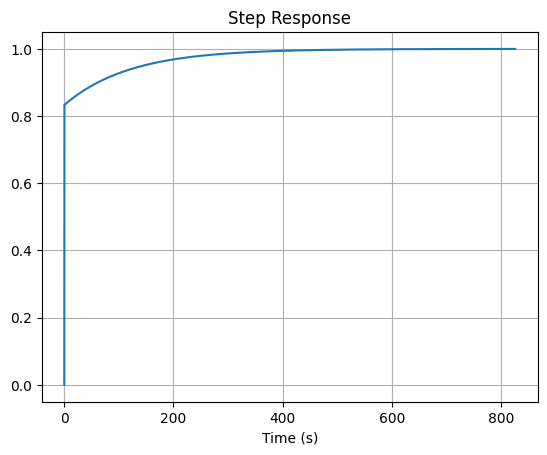

In [ ]:
Kp = best_params[0]
Ki = best_params[1]
Kd = best_params[2]

T, t, y =transfer_function(Kp,Ki,Kd)

plt.plot(t,y)
plt.title("Step Response")
plt.xlabel("Time (s)")
plt.grid()